In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initnial EDA

### Read the data

In [2]:
df = pd.read_csv('data.csv', usecols=[*range(0,12)], names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,39,A0,77516,B0,13,C0,D0,E0,2174,0,40,0
1,50,A1,83311,B0,13,C1,D0,E0,0,0,13,0
2,38,A2,215646,B1,9,C2,D0,E0,0,0,40,0
3,53,A2,234721,B2,7,C2,D1,E0,0,0,40,0
4,28,A2,338409,B0,13,C3,D1,E1,0,0,40,0


In [4]:
df.shape

(10000, 12)

**The data does not seems to have a header/column row, it is reread with an added column name**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   1       10000 non-null  object
 2   2       10000 non-null  int64 
 3   3       10000 non-null  object
 4   4       10000 non-null  int64 
 5   5       10000 non-null  object
 6   6       10000 non-null  object
 7   7       10000 non-null  object
 8   8       10000 non-null  int64 
 9   9       10000 non-null  int64 
 10  10      10000 non-null  int64 
 11  11      10000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 937.6+ KB


**There are no null value**

In [6]:
df.describe()

,0,2,4,8,9,10,11
count,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.338300,1.906607e+05,10.12510,1077.261800,89.555300,41.067400,0.246100
std,13.086099,1.053789e+05,2.54411,7344.244588,403.778098,11.935112,0.430759
min,17.000000,1.930200e+04,1.00000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.185045e+05,9.00000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.794230e+05,10.00000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.395390e+05,13.00000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.226583e+06,16.00000,99999.000000,3004.000000,99.000000,1.000000


#### Check unique values in each column
##### All cols

In [7]:
columns = [*range(0,12)]
categorical_columns = [1, 3, 5, 6, 7]
for index, i in enumerate(columns):
    if index in categorical_columns: 
        data_type = 'categorical'
    else : 
        data_type = 'numeric'
    print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 1 	 has 7 unique values, categorical
column 2 	 has 8457 unique values, numeric
column 3 	 has 16 unique values, categorical
column 4 	 has 16 unique values, numeric
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### numeric only

In [8]:
for index, i in enumerate(columns):
    data_type = 'numeric'
    if index not in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 2 	 has 8457 unique values, numeric
column 4 	 has 16 unique values, numeric
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### categorical

In [9]:
col_to_add = 0
for index, i in enumerate(columns):
    data_type = 'categorical'
    if index in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))
        col_to_add+=len(df[i].unique())
print('col to be added with dummbies', col_to_add)

column 1 	 has 7 unique values, categorical
column 3 	 has 16 unique values, categorical
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
col to be added with dummbies 44


#### col 11 unique values

In [10]:
df[11].unique()

array([0, 1])

#### Graphs

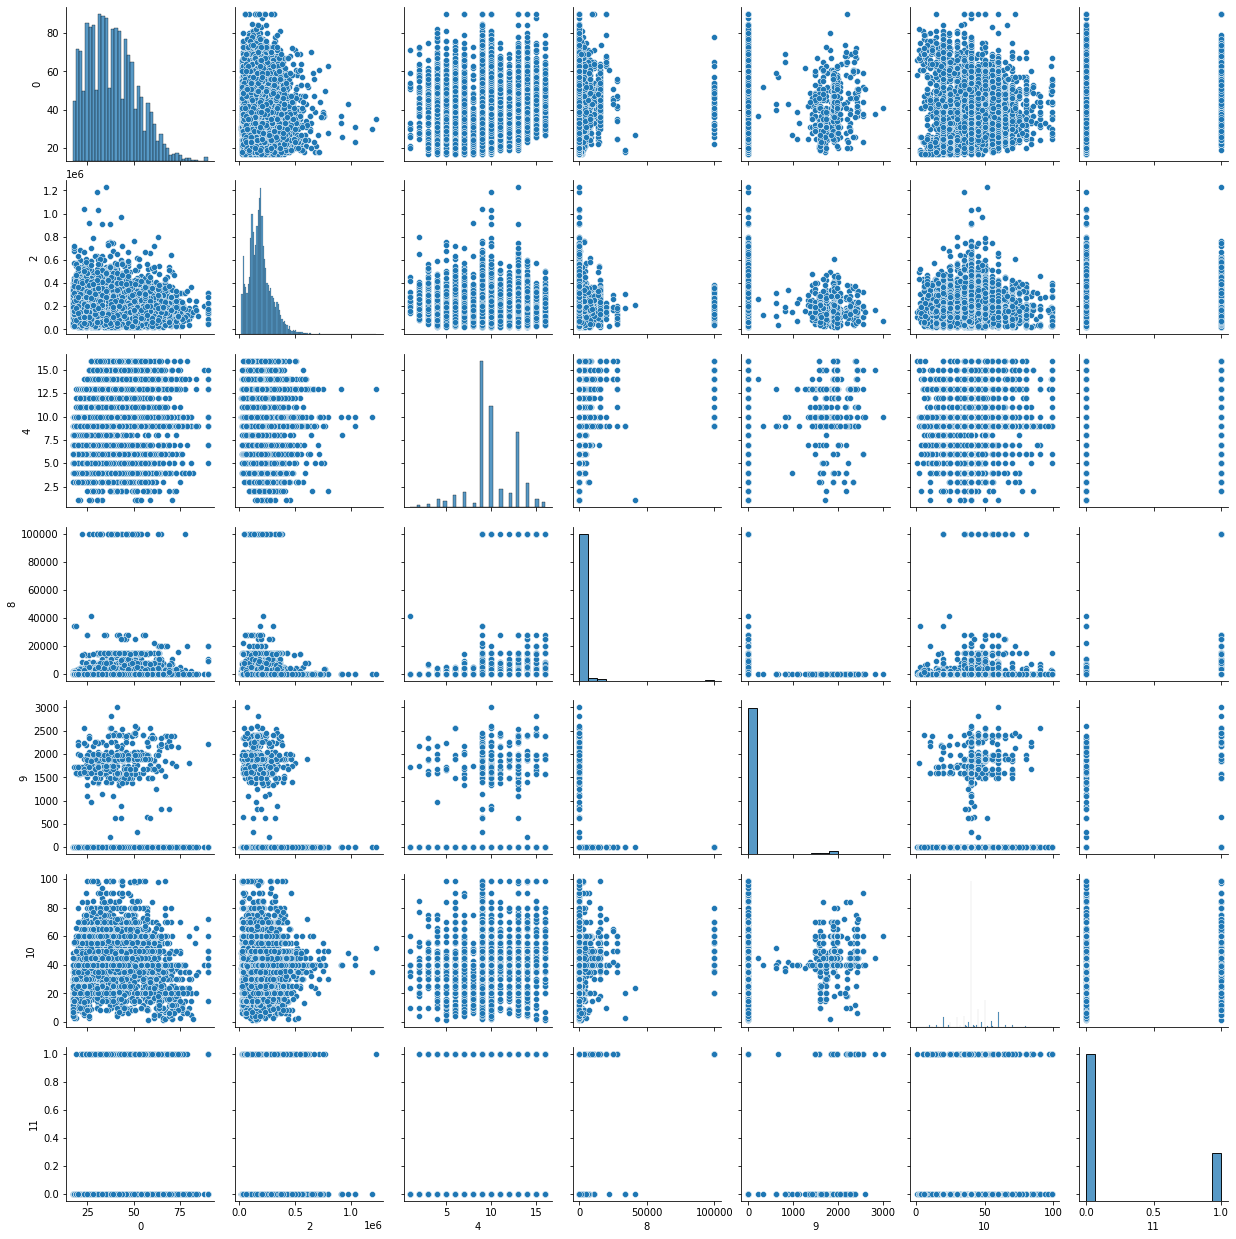

In [11]:
sns.pairplot(df)

<AxesSubplot:>

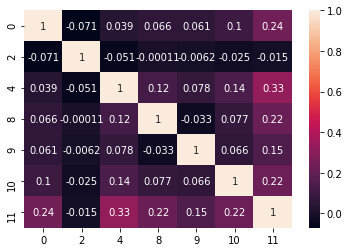

In [12]:
sns.heatmap(df[[0, 2, 4, 8, 9, 10, 11]].corr(), annot = True)

**There are very little correlation between the numeric data and the target column**

#### Check the distribution of the categorical data

1


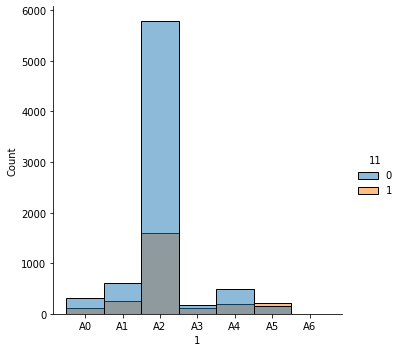

In [13]:
print(1)
sns.displot(df, x=df[1], hue=df[11])

3


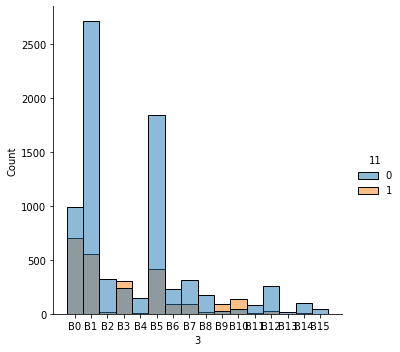

In [14]:
print(3)
sns.displot(df, x=df[3], hue=df[11])

5


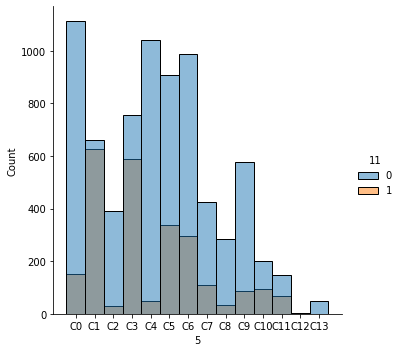

In [15]:
print(5)
sns.displot(df, x=df[5], hue=df[11])

6


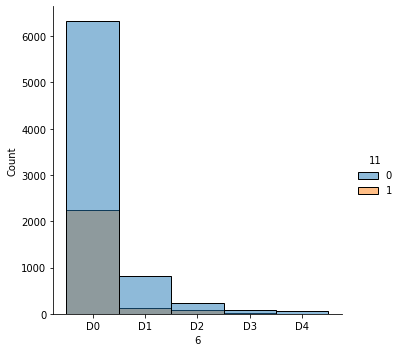

In [16]:
print(6)
sns.displot(df, x=df[6], hue=df[11])

7


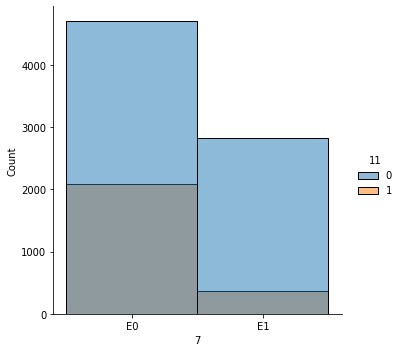

In [17]:
print(7)
sns.displot(df, x=df[7], hue=df[11])

#### Target data distribution

In [65]:
df[11].value_counts()

0    7539
1    2461
Name: 11, dtype: int64

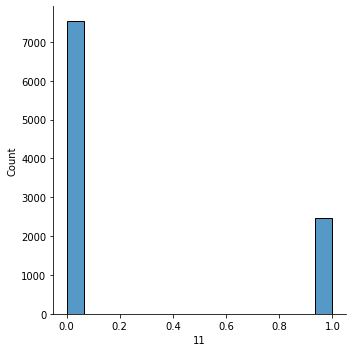

In [18]:
sns.displot(df[11])

### Feature Engineering on the categorical columns
#### Each Unique values get a col

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df[[1]]).toarray()
feature_label = [str(1) + "_" + str(i) for i in range(feature_arr.shape[1])]
feature = pd.DataFrame(feature_arr, columns=feature_label)

In [21]:
# if data is categorical, transform them
df_ohe = df.copy()
for index, i in enumerate(columns):
    if index in categorical_columns: 
        ohe = OneHotEncoder()
        feature_arr = ohe.fit_transform(df[[index]]).toarray()
        feature_label = [str(index) + "_" + str(k) for k in range(feature_arr.shape[1])]
        feature = pd.DataFrame(feature_arr, columns=feature_label)
        # drop the last col
        # feature = feature.iloc[:, :-1]
        df_ohe = pd.concat([df_ohe, feature], axis=1)
        df_ohe.drop(index, axis=1, inplace=True)

In [22]:
df_ohe.head()

,0,2,4,8,9,10,11,1_0,1_1,1_2,...,5_11,5_12,5_13,6_0,6_1,6_2,6_3,6_4,7_0,7_1
0,39,77516,13,2174,0,40,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
df_ohe.columns

Index([     0,      2,      4,      8,      9,     10,     11,  '1_0',  '1_1',
        '1_2',  '1_3',  '1_4',  '1_5',  '1_6',  '3_0',  '3_1',  '3_2',  '3_3',
        '3_4',  '3_5',  '3_6',  '3_7',  '3_8',  '3_9', '3_10', '3_11', '3_12',
       '3_13', '3_14', '3_15',  '5_0',  '5_1',  '5_2',  '5_3',  '5_4',  '5_5',
        '5_6',  '5_7',  '5_8',  '5_9', '5_10', '5_11', '5_12', '5_13',  '6_0',
        '6_1',  '6_2',  '6_3',  '6_4',  '7_0',  '7_1'],
      dtype='object')

## Train

### Base Model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [32]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.5827 - val_loss: 0.4820
Epoch 2/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4966 - val_loss: 0.4460
Epoch 3/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4743 - val_loss: 0.4325
Epoch 4/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4542 - val_loss: 0.4252
Epoch 5/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4492 - val_loss: 0.4187
Epoch 6/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4443 - val_loss: 0.4148
Epoch 7/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4374 - val_loss: 0.4102
Epoch 8/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4349 - val_loss: 0.4074
Epoch 9/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4298 - val_loss: 0.4063
Epoch 10/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.427

219/219 [==============================] - 0s 2ms/step - loss: 0.3623 - val_loss: 0.3795
Epoch 81/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3617 - val_loss: 0.3789
Epoch 82/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3593 - val_loss: 0.3788
Epoch 83/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3549 - val_loss: 0.3765
Epoch 84/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3585 - val_loss: 0.3813
Epoch 85/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3586 - val_loss: 0.3813
Epoch 86/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.3791
Epoch 87/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3605 - val_loss: 0.3837
Epoch 88/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3590 - val_loss: 0.3794
Epoch 89/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.3575 - v

<AxesSubplot:>

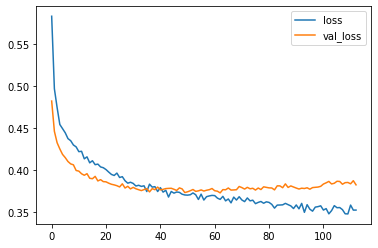

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[2142  126]
 [ 366  366]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2268
           1       0.74      0.50      0.60       732

    accuracy                           0.84      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.83      0.84      0.82      3000

accuracy_score 0.836


#### PCA
##### Standarize the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
# scale without col 11, the target col
scaler.fit(df_ohe.drop([11], axis=1))

StandardScaler()

In [40]:
scaled_data = scaler.transform(df_ohe.drop([11], axis=1))

#### PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
pca.fit(scaled_data)

PCA(n_components=2)

In [44]:
x_pca = pca.transform(scaled_data)

In [45]:
x_pca.shape

(10000, 2)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

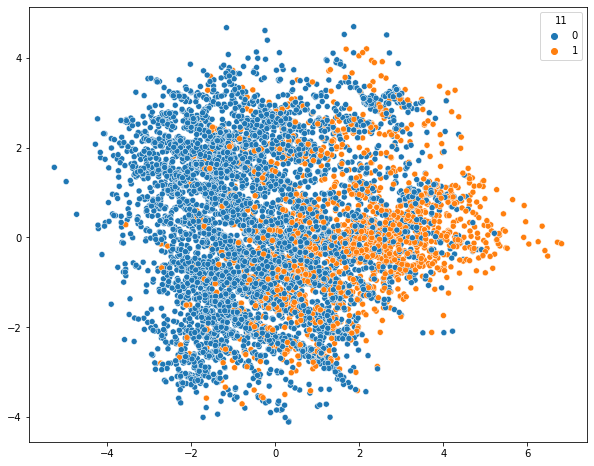

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df[11])

### Split the data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = x_pca
y = df_ohe[11].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [53]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.5331 - val_loss: 0.4472
Epoch 2/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4811 - val_loss: 0.4448
Epoch 3/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4761 - val_loss: 0.4448
Epoch 4/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4739 - val_loss: 0.4428
Epoch 5/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4695 - val_loss: 0.4431
Epoch 6/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4704 - val_loss: 0.4427
Epoch 7/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4632 - val_loss: 0.4399
Epoch 8/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4650 - val_loss: 0.4392
Epoch 9/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4694 - val_loss: 0.4391
Epoch 10/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.460

219/219 [==============================] - 0s 1ms/step - loss: 0.4579 - val_loss: 0.4383
Epoch 81/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4527 - val_loss: 0.4377
Epoch 82/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4548 - val_loss: 0.4389
Epoch 83/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4561 - val_loss: 0.4393
Epoch 84/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4521 - val_loss: 0.4373
Epoch 85/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4494 - val_loss: 0.4370
Epoch 86/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.4536 - val_loss: 0.4374
Epoch 87/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4523 - val_loss: 0.4408
Epoch 88/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4532 - val_loss: 0.4371
Epoch 89/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4573 - v

<AxesSubplot:>

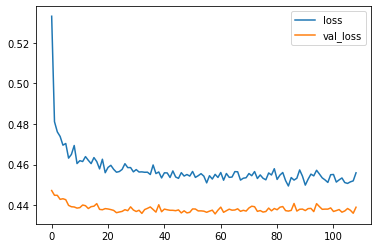

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Predictions

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2152  116]
 [ 484  248]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2268
           1       0.68      0.34      0.45       732

    accuracy                           0.80      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.78      0.80      0.77      3000

accuracy_score 0.8


### Different model

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [60]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [62]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.6041 - val_loss: 0.5458
Epoch 2/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5618 - val_loss: 0.5304
Epoch 3/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5510 - val_loss: 0.5217
Epoch 4/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.5377 - val_loss: 0.5119
Epoch 5/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.5337 - val_loss: 0.5038
Epoch 6/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.5286 - val_loss: 0.4993
Epoch 7/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.5191 - val_loss: 0.4930
Epoch 8/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.5162 - val_loss: 0.4872
Epoch 9/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.5091 - val_loss: 0.4817
Epoch 10/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.506

219/219 [==============================] - 0s 1ms/step - loss: 0.4378 - val_loss: 0.4114
Epoch 81/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4378 - val_loss: 0.4100
Epoch 82/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4357 - val_loss: 0.4097
Epoch 83/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4360 - val_loss: 0.4099
Epoch 84/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4369 - val_loss: 0.4090
Epoch 85/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4366 - val_loss: 0.4096
Epoch 86/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4092
Epoch 87/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4081
Epoch 88/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4362 - val_loss: 0.4088
Epoch 89/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4302 - v

219/219 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.3968
Epoch 160/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.3959
Epoch 161/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4146 - val_loss: 0.3944
Epoch 162/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4118 - val_loss: 0.3935
Epoch 163/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3975
Epoch 164/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.3944
Epoch 165/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4150 - val_loss: 0.3938
Epoch 166/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4118 - val_loss: 0.3930
Epoch 167/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4102 - val_loss: 0.3948
Epoch 168/1000
219/219 [==============================] - 0s 1ms/step - loss: 0

Epoch 238/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4011 - val_loss: 0.3891
Epoch 239/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4027 - val_loss: 0.3876
Epoch 240/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.3875
Epoch 241/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4006 - val_loss: 0.3878
Epoch 242/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4023 - val_loss: 0.3864
Epoch 243/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4041 - val_loss: 0.3873
Epoch 244/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4048 - val_loss: 0.3887
Epoch 245/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4053 - val_loss: 0.3868
Epoch 246/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4018 - val_loss: 0.3867
Epoch 247/1000
219/219 [==============================] - 0s 1ms

Epoch 317/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3920 - val_loss: 0.3826
Epoch 318/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4010 - val_loss: 0.3846
Epoch 319/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3926 - val_loss: 0.3816
Epoch 320/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3938 - val_loss: 0.3818
Epoch 321/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3936 - val_loss: 0.3818
Epoch 322/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3908 - val_loss: 0.3820
Epoch 323/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3917 - val_loss: 0.3856
Epoch 324/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3886 - val_loss: 0.3836
Epoch 325/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3944 - val_loss: 0.3823
Epoch 326/1000
219/219 [==============================] - 0s 1ms

Epoch 396/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3874 - val_loss: 0.3786
Epoch 397/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 0.3814
Epoch 398/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3876 - val_loss: 0.3807
Epoch 399/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3791
Epoch 400/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3819
Epoch 401/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3838 - val_loss: 0.3822
Epoch 402/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3894 - val_loss: 0.3799
Epoch 403/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3793 - val_loss: 0.3798
Epoch 404/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3884 - val_loss: 0.3798
Epoch 405/1000
219/219 [==============================] - 0s 1ms

Epoch 475/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.3755 - val_loss: 0.3793
Epoch 476/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.3772
Epoch 477/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3764 - val_loss: 0.3777
Epoch 478/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3771
Epoch 479/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3772 - val_loss: 0.3768
Epoch 480/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3779
Epoch 481/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3751 - val_loss: 0.3773
Epoch 482/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.3785
Epoch 483/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3814 - val_loss: 0.3778
Epoch 484/1000
219/219 [==============================] - 0s 1ms

<AxesSubplot:>

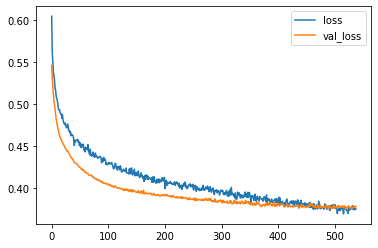

In [63]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [64]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2138  130]
 [ 388  344]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2268
           1       0.73      0.47      0.57       732

    accuracy                           0.83      3000
   macro avg       0.79      0.71      0.73      3000
weighted avg       0.82      0.83      0.81      3000

accuracy_score 0.8273333333333334
